# ESRGAN Inference

In this notebook we will use Basic SR library to upsample images using ESRGAN

# First we will clone the [BasicSR](https://github.com/xinntao/BasicSR) repo

In [1]:
!git clone https://github.com/xinntao/BasicSR.git

Cloning into 'BasicSR'...
remote: Enumerating objects: 4226, done.
remote: Total 4226 (delta 0), reused 0 (delta 0), pack-reused 4226
Receiving objects: 100% (4226/4226), 2.42 MiB | 24.58 MiB/s, done.
Resolving deltas: 100% (2559/2559), done.


In [2]:
#lets move to BasicSR directory
%cd BasicSR

/content/BasicSR


In [ ]:
cd datasets/

/content/BasicSR/datasets


In [ ]:
cd ..

/content/BasicSR


In [ ]:
cd ..

/content/BasicSR


In [ ]:
ls

assets/   datasets/     inference/  README_CN.md      scripts/   tests/
basicsr/  docs/         LICENSE/    README.md         setup.cfg  VERSION
colab/    experiments/  options/    requirements.txt  setup.py


In [3]:
import torch
import glob
import numpy as np
import os

In [4]:
from google.colab import files
import shutil

In [5]:
import cv2
import matplotlib.pyplot as plt

In [6]:
# Time to install the requirements
!pip install -r requirements.txt

     |████████████████████████████████| 12.2MB 225kB/s 
     |████████████████████████████████| 194kB 56.3MB/s 


In [7]:
# lets setup the BasicSR library without cuda extensions
!python setup.py develop --no_cuda_ext

running develop
running egg_info
creating basicsr.egg-info
writing basicsr.egg-info/PKG-INFO
writing dependency_links to basicsr.egg-info/dependency_links.txt
writing requirements to basicsr.egg-info/requires.txt
writing top-level names to basicsr.egg-info/top_level.txt
writing manifest file 'basicsr.egg-info/SOURCES.txt'
writing manifest file 'basicsr.egg-info/SOURCES.txt'
/usr/local/lib/python3.6/dist-packages/torch/utils/cpp_extension.py:339: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
running build_ext
Creating /usr/local/lib/python3.6/dist-packages/basicsr.egg-link (link to .)
Adding basicsr 1.2.0+1464d8e to easy-install.pth file

Installed /content/BasicSR
Processing dependencies for basicsr==1.2.0+1464d8e
Searching for yapf==0.30.0
Best match: yapf 0.30.0
Adding yapf 0.30.0 to easy-install.pth file
Installing yapf script to

# Downloading the pretrained models for inference

In [8]:
!python scripts/download_pretrained_models.py ESRGAN

Download 63.8 MB / 63.8 MB: 100% 2043/2043 [00:00<00:00, 2991.54chunk/s]
Download 63.8 MB / 63.8 MB: 100% 2043/2043 [00:00<00:00, 2969.62chunk/s]


# Downloading the demo test datasets like Set5 and Set14

In [9]:
# it also creates low resolution images for the datasets
!python scripts/data_preparation/download_datasets.py Set5
!python scripts/data_preparation/download_datasets.py Set14

Download 2.0 MB / 2.0 MB: 100% 65/65 [00:00<00:00, 4711.15chunk/s]
Extract /content/BasicSR/datasets/Set5.zip to /content/BasicSR/datasets/Set5
Move /content/BasicSR/datasets/Set5/Set5 to /content/BasicSR/datasets/Set5
Download 11.9 MB / 11.9 MB: 100% 381/381 [00:00<00:00, 5854.15chunk/s]
Extract /content/BasicSR/datasets/Set14.zip to /content/BasicSR/datasets/Set14
Move /content/BasicSR/datasets/Set14/Set14 to /content/BasicSR/datasets/Set14


# Inference using test.py file and the configuration yaml file
Images are stored in results folder

In [10]:
!python basicsr/test.py -opt options/test/ESRGAN/test_ESRGAN_x4_woGT.yml

Cannot import dcn. Ignore this warning if dcn is not used. Otherwise install BasicSR with compiling dcn.
Cannot import fused_act and upfirdn2d. Ignore this warning if they are not used. Otherwise install BasicSR with compiling them.
Disable distributed.
2020-12-06 20:46:33,880 INFO: 
                ____                _       _____  ____
               / __ ) ____ _ _____ (_)_____/ ___/ / __ \
              / __  |/ __ `// ___// // ___/\__ \ / /_/ /
             / /_/ // /_/ /(__  )/ // /__ ___/ // _, _/
            /_____/ \__,_//____//_/ \___//____//_/ |_|
     ______                   __   __                 __      __
    / ____/____   ____   ____/ /  / /   __  __ _____ / /__   / /
   / / __ / __ \ / __ \ / __  /  / /   / / / // ___// //_/  / /
  / /_/ // /_/ // /_/ // /_/ /  / /___/ /_/ // /__ / /<    /_/
  \____/ \____/ \____/ \____/  /_____/\____/ \___//_/|_|  (_)
    
Version Information: 
	BasicSR: 1.2.0+1464d8e
	PyTorch: 1.7.0+cu101
	TorchVision: 0.8.1+cu101
2020-12-06 20:46

# Visualize the images generated by this inference approach

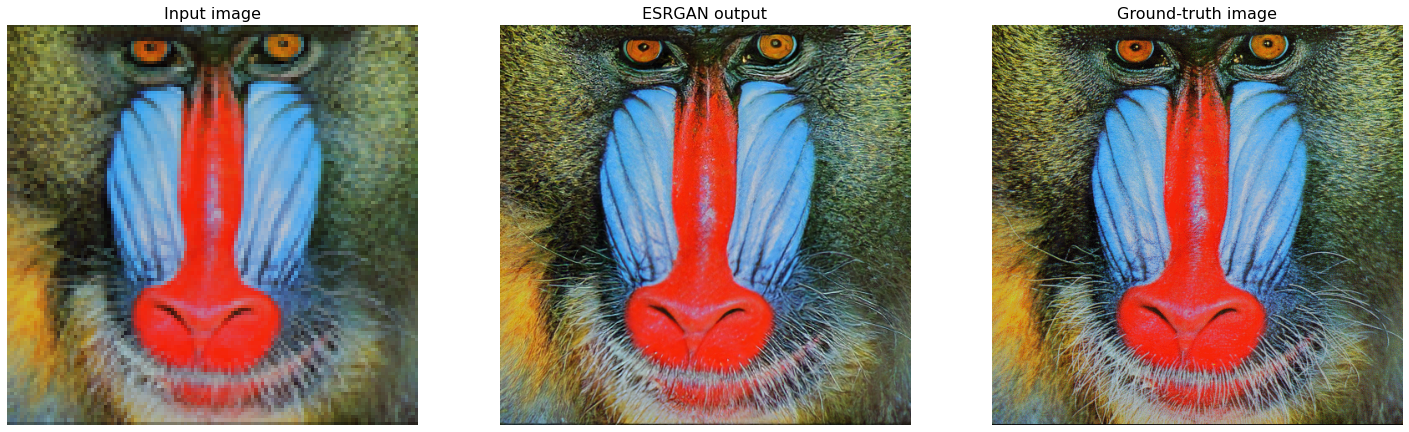

In [11]:
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img_input = imread('datasets/Set14/LRbicx4/baboon.png')
img_esrgan = imread('results/ESRGAN_SRx4_DF2KOST_official/visualization/Set14/baboon_ESRGAN_SRx4_DF2KOST_official.png')
img_gt = imread('datasets/Set14/GTmod12/baboon.png')

# show and compare the results
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 3, 1) 
plt.title('Input image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 3, 2)
plt.title('ESRGAN output', fontsize=16)
ax2.axis('off')
ax3 = fig.add_subplot(1, 3, 3) 
plt.title('Ground-truth image', fontsize=16)
ax3.axis('off')
ax1.imshow(img_input)
ax2.imshow(img_esrgan)
ax3.imshow(img_gt)

# Inference by writing small piece of testing code
Images are stored in results/ESRGAN folder

In [12]:
from basicsr.models.archs.rrdbnet_arch import RRDBNet

Cannot import dcn. Ignore this warning if dcn is not used. Otherwise install BasicSR with compiling dcn.
Cannot import fused_act and upfirdn2d. Ignore this warning if they are not used. Otherwise install BasicSR with compiling them.


In [13]:
# lets get the configuration 

model_path = 'experiments/pretrained_models/ESRGAN/ESRGAN_SRx4_DF2KOST_official-ff704c30.pth'
#LR images folder
folder = 'datasets/Set14/LRbicx4'
#setting the device to cuda
device = torch.device('cuda')

# lets setup the model
model = RRDBNet(
    num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32)

model.load_state_dict(torch.load(model_path)['params'], strict=True)
# evaluation of the model
model.eval()
# putting the model on cuda device
model = model.to(device)

# time to make our directory to store results
os.makedirs('results/ESRGAN', exist_ok=True)

#time to iterate over the LR images and then store the results
for idx, path in enumerate(sorted(glob.glob(os.path.join(folder, '*')))):
  imgname = os.path.splitext(os.path.basename(path))[0]
  print(idx, imgname)
  # read image
  img = cv2.imread(path, cv2.IMREAD_COLOR).astype(np.float32) / 255.
  img = torch.from_numpy(np.transpose(img[:, :, [2, 1, 0]],
                                      (2, 0, 1))).float()
  img = img.unsqueeze(0).to(device)
  # inference
  with torch.no_grad():
      output = model(img)
  # save image
  output = output.data.squeeze().float().cpu().clamp_(0, 1).numpy()
  output = np.transpose(output[[2, 1, 0], :, :], (1, 2, 0))
  output = (output * 255.0).round().astype(np.uint8)
  cv2.imwrite(f'results/ESRGAN/{imgname}_ESRGAN.png', output)



0 baboon
1 barbara
2 bridge
3 coastguard
4 comic
5 face
6 flowers
7 foreman
8 lenna
9 man
10 monarch
11 pepper
12 ppt3
13 zebra


# Lets try the same thing for Set5

In [14]:

model_path = 'experiments/pretrained_models/ESRGAN/ESRGAN_SRx4_DF2KOST_official-ff704c30.pth'
#LR images folder
folder = 'datasets/Set5/LRbicx4'
#setting the device to cuda
device = torch.device('cuda')

# lets setup the model
model = RRDBNet(
    num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32)

model.load_state_dict(torch.load(model_path)['params'], strict=True)
# evaluation of the model
model.eval()
# putting the model on cuda device
model = model.to(device)

# time to make our directory to store results
os.makedirs('results/ESRGAN/Set5', exist_ok=True)

#time to iterate over the LR images and then store the results
for idx, path in enumerate(sorted(glob.glob(os.path.join(folder, '*')))):
  imgname = os.path.splitext(os.path.basename(path))[0]
  print(idx, imgname)
  # read image
  img = cv2.imread(path, cv2.IMREAD_COLOR).astype(np.float32) / 255.
  img = torch.from_numpy(np.transpose(img[:, :, [2, 1, 0]],
                                      (2, 0, 1))).float()
  img = img.unsqueeze(0).to(device)
  # inference
  with torch.no_grad():
      output = model(img)
  # save image
  output = output.data.squeeze().float().cpu().clamp_(0, 1).numpy()
  output = np.transpose(output[[2, 1, 0], :, :], (1, 2, 0))
  output = (output * 255.0).round().astype(np.uint8)
  cv2.imwrite(f'results/ESRGAN/Set5/{imgname}_ESRGAN.png', output)

0 baby
1 bird
2 butterfly
3 head
4 woman


In [15]:
# Method to show the images created
def show_results(img_input,img_esrgan,img_gt):
  # show and compare the results
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 3, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 3, 2)
  plt.title('ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax3 = fig.add_subplot(1, 3, 3) 
  plt.title('Ground-truth image', fontsize=16)
  ax3.axis('off')
  ax1.imshow(img_input)
  ax2.imshow(img_esrgan)
  ax3.imshow(img_gt)

# Comparing the images created using this approach

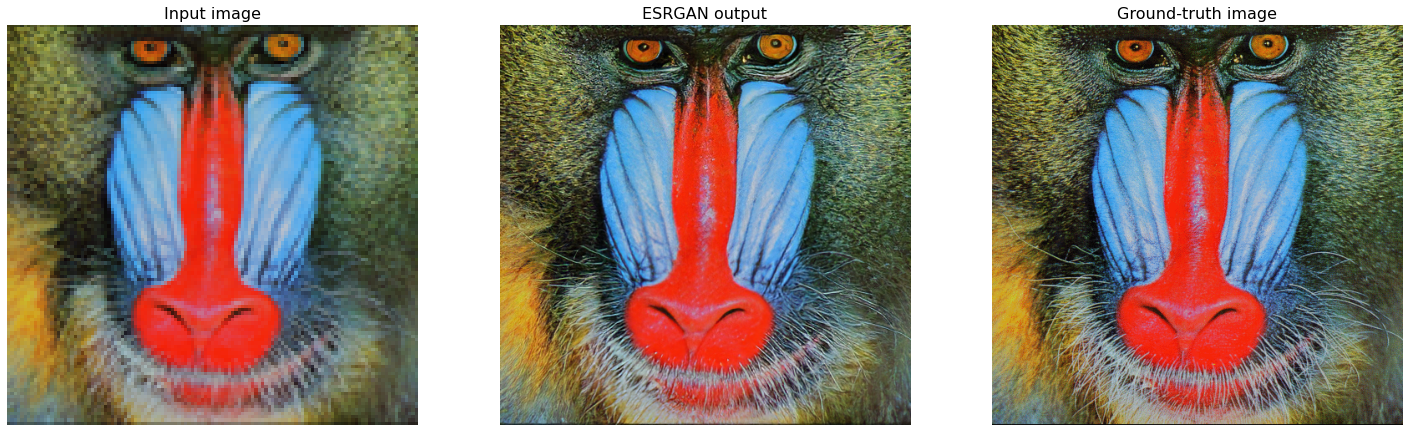

In [16]:
# read images
img_input = imread('datasets/Set14/LRbicx4/baboon.png')
img_esrgan = imread('results/ESRGAN/baboon_ESRGAN.png')
img_gt = imread('datasets/Set14/GTmod12/baboon.png')

show_results(img_input, img_esrgan,img_gt)

# Lets see some more images created

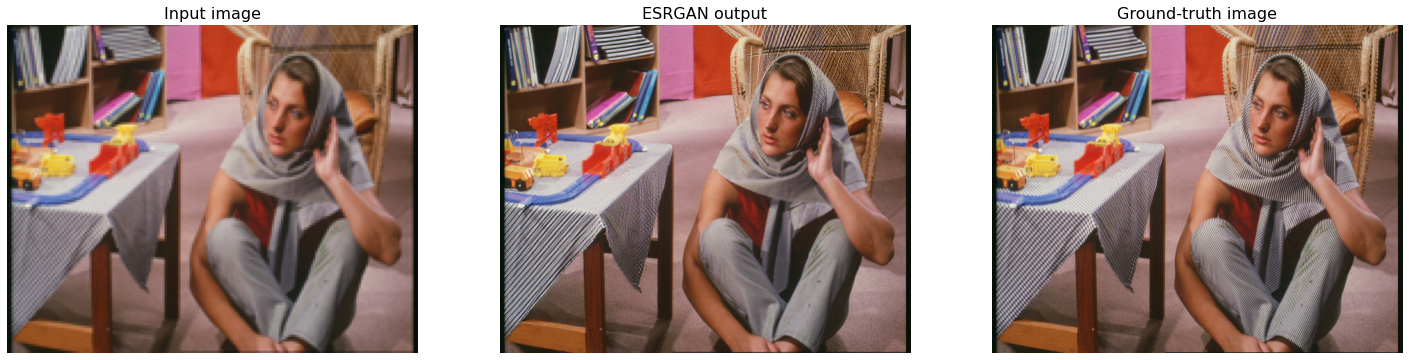

In [17]:

# read images
img_input = imread('datasets/Set14/LRbicx4/barbara.png')
img_esrgan = imread('results/ESRGAN/barbara_ESRGAN.png')
img_gt = imread('datasets/Set14/GTmod12/barbara.png')

show_results(img_input, img_esrgan,img_gt)

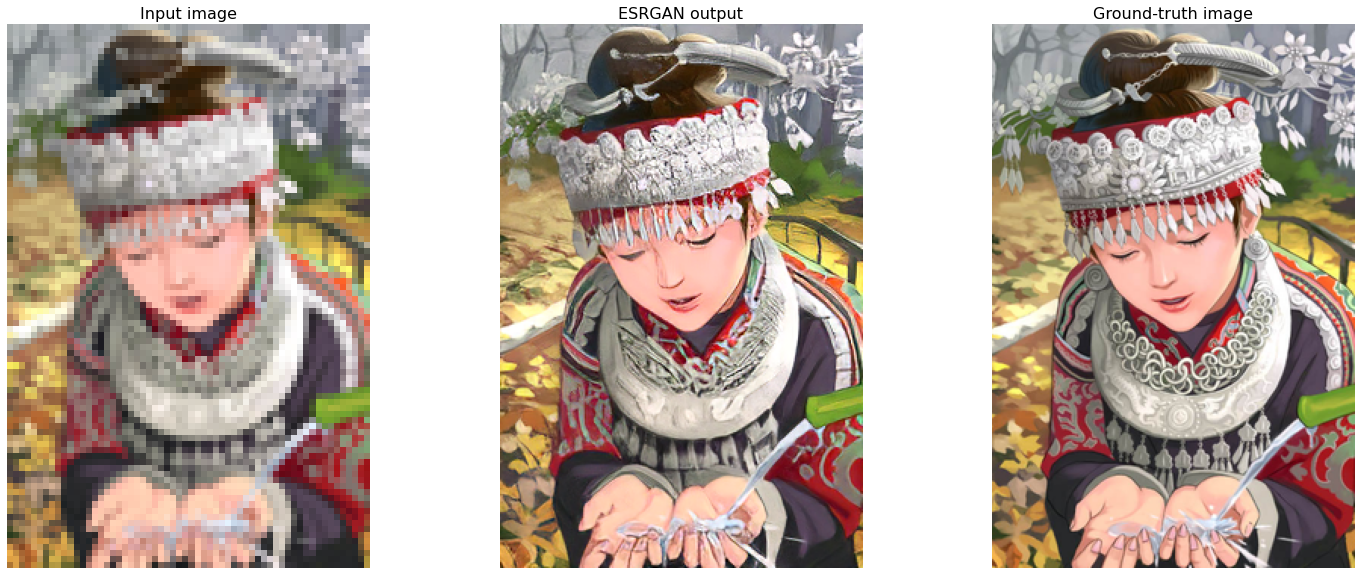

In [18]:
img_input = imread('/content/BasicSR/datasets/Set14/LRbicx4/comic.png')
img_esrgan = imread('/content/BasicSR/results/ESRGAN/comic_ESRGAN.png')
img_gt = imread('/content/BasicSR/datasets/Set14/GTmod12/comic.png')

show_results(img_input, img_esrgan,img_gt)

# The perceptual qualtiy of the images is just fascinating lets see how they perform on PSNR

In [19]:
# PSNR Calculation method
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    return 20 * np.log10(255.0 / np.sqrt(mse))

In [20]:
list_esrgan = []
for filepath in glob.iglob('/content/BasicSR/results/ESRGAN/*.png'):
  list_esrgan.append(filepath)
list_esrgan.sort()

In [21]:
list_hr = []
for filepath in glob.iglob('/content/BasicSR/datasets/Set14/GTmod12/*.png'):
  list_hr.append(filepath)
list_hr.sort()

In [22]:
list_psnr = []
for i in range(len(list_esrgan)):
  img_hr = cv2.imread(list_hr[i])
  img_sr = cv2.imread(list_esrgan[i])
  list_psnr.append(psnr(img_hr, img_sr))

In [23]:
np.mean(list_psnr)

31.211535879061532

In [24]:
#PSNR For Set5 images
list_hr = []
for filepath in glob.iglob('/content/BasicSR/datasets/Set5/GTmod12/*.png'):
  list_hr.append(filepath)
list_hr.sort()

In [25]:
list_esrgan = []
for filepath in glob.iglob('/content/BasicSR/results/ESRGAN/Set5/*.png'):
  list_esrgan.append(filepath)
list_esrgan.sort()

In [26]:
list_psnr = []
for i in range(len(list_esrgan)):
  img_hr = cv2.imread(list_hr[i])
  img_sr = cv2.imread(list_esrgan[i])
  list_psnr.append(psnr(img_hr, img_sr))

In [27]:
np.mean(list_psnr)

32.486478952426154

# Lets try to develop a small functionality and do this on uploaded images

In [28]:
upload_folder = 'datasets/upload'
result_folder = 'results/ESRGAN/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving ammar.png to ammar.png
move ammar.png to datasets/upload/ammar.png


In [29]:
model_path = 'experiments/pretrained_models/ESRGAN/ESRGAN_SRx4_DF2KOST_official-ff704c30.pth'
#LR images folder
folder = upload_folder
#setting the device to cuda
device = torch.device('cuda')

# lets setup the model
model = RRDBNet(
    num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32)

model.load_state_dict(torch.load(model_path)['params'], strict=True)
# evaluation of the model
model.eval()
# putting the model on cuda device
model = model.to(device)

# time to make our directory to store results
os.makedirs(result_folder, exist_ok=True)

#time to iterate over the LR images and then store the results
for idx, path in enumerate(sorted(glob.glob(os.path.join(folder, '*')))):
  imgname = os.path.splitext(os.path.basename(path))[0]
  print(idx, imgname)
  # read image
  img = cv2.imread(path, cv2.IMREAD_COLOR).astype(np.float32) / 255.
  img = torch.from_numpy(np.transpose(img[:, :, [2, 1, 0]],
                                      (2, 0, 1))).float()
  img = img.unsqueeze(0).to(device)
  # inference
  with torch.no_grad():
      output = model(img)
  # save image
  output = output.data.squeeze().float().cpu().clamp_(0, 1).numpy()
  output = np.transpose(output[[2, 1, 0], :, :], (1, 2, 0))
  output = (output * 255.0).round().astype(np.uint8)
  cv2.imwrite(f'results/ESRGAN/upload/{imgname}_ESRGAN.png', output)

0 ammar


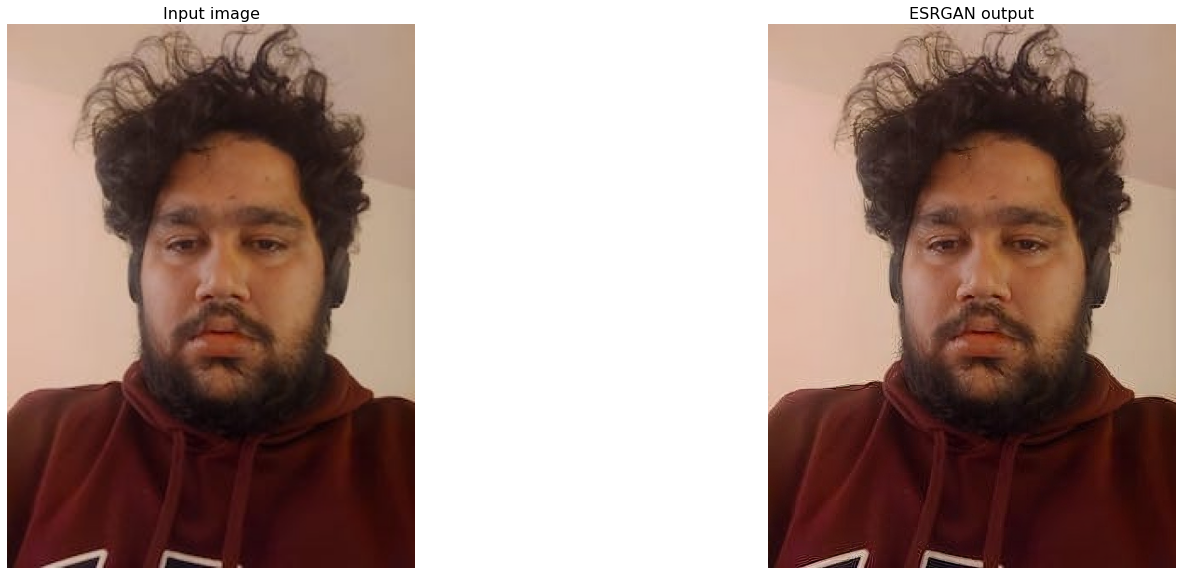

In [30]:
# visualize
import os
import glob
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
  
input_list = sorted(glob.glob(os.path.join(upload_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

# Download the result generated

In [31]:
# download the result
print(f'Download {result_folder}')
os.system(f'zip -r -j download.zip {result_folder}/*')
files.download("download.zip")

Download results/ESRGAN/upload


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
cd ..

/content


In [49]:
!unzip BSDS100.zip

Archive:  BSDS100.zip
   creating: BSDS100/
  inflating: __MACOSX/._BSDS100      
  inflating: BSDS100/65033.png       
  inflating: __MACOSX/BSDS100/._65033.png  
  inflating: BSDS100/148089.png      
  inflating: __MACOSX/BSDS100/._148089.png  
  inflating: BSDS100/21077.png       
  inflating: __MACOSX/BSDS100/._21077.png  
  inflating: BSDS100/41033.png       
  inflating: __MACOSX/BSDS100/._41033.png  
  inflating: BSDS100/175043.png      
  inflating: __MACOSX/BSDS100/._175043.png  
  inflating: BSDS100/12084.png       
  inflating: __MACOSX/BSDS100/._12084.png  
  inflating: BSDS100/108082.png      
  inflating: __MACOSX/BSDS100/._108082.png  
  inflating: BSDS100/134035.png      
  inflating: __MACOSX/BSDS100/._134035.png  
  inflating: BSDS100/299086.png      
  inflating: __MACOSX/BSDS100/._299086.png  
  inflating: BSDS100/376043.png      
  inflating: __MACOSX/BSDS100/._376043.png  
  inflating: BSDS100/45096.png       
  inflating: __MACOSX/BSDS100/._45096.png  
  inflatin

In [38]:
!unzip low_res_bsd.zip

Archive:  low_res_bsd.zip
   creating: low_res_bsd/
  inflating: __MACOSX/._low_res_bsd  
  inflating: low_res_bsd/65033.png   
  inflating: __MACOSX/low_res_bsd/._65033.png  
  inflating: low_res_bsd/148089.png  
  inflating: __MACOSX/low_res_bsd/._148089.png  
  inflating: low_res_bsd/21077.png   
  inflating: __MACOSX/low_res_bsd/._21077.png  
  inflating: low_res_bsd/41033.png   
  inflating: __MACOSX/low_res_bsd/._41033.png  
  inflating: low_res_bsd/175043.png  
  inflating: __MACOSX/low_res_bsd/._175043.png  
  inflating: low_res_bsd/12084.png   
  inflating: __MACOSX/low_res_bsd/._12084.png  
  inflating: low_res_bsd/108082.png  
  inflating: __MACOSX/low_res_bsd/._108082.png  
  inflating: low_res_bsd/134035.png  
  inflating: __MACOSX/low_res_bsd/._134035.png  
  inflating: low_res_bsd/299086.png  
  inflating: __MACOSX/low_res_bsd/._299086.png  
  inflating: low_res_bsd/376043.png  
  inflating: __MACOSX/low_res_bsd/._376043.png  
  inflating: low_res_bsd/45096.png   
  infl

# Evaluating the performance on BSD100

In [52]:
cd BasicSR/

/content/BasicSR


In [42]:
model_path = 'experiments/pretrained_models/ESRGAN/ESRGAN_SRx4_DF2KOST_official-ff704c30.pth'
#LR images folder
folder = 'datasets/low_res_bsd/'
#setting the device to cuda
device = torch.device('cuda')

# lets setup the model
model = RRDBNet(
    num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32)

model.load_state_dict(torch.load(model_path)['params'], strict=True)
# evaluation of the model
model.eval()
# putting the model on cuda device
model = model.to(device)

# time to make our directory to store results
os.makedirs('results/ESRGAN/BSD100', exist_ok=True)

#time to iterate over the LR images and then store the results
for idx, path in enumerate(sorted(glob.glob(os.path.join(folder, '*')))):
  imgname = os.path.splitext(os.path.basename(path))[0]
  print(idx, imgname)
  # read image
  img = cv2.imread(path, cv2.IMREAD_COLOR).astype(np.float32) / 255.
  img = torch.from_numpy(np.transpose(img[:, :, [2, 1, 0]],
                                      (2, 0, 1))).float()
  img = img.unsqueeze(0).to(device)
  # inference
  with torch.no_grad():
      output = model(img)
  # save image
  output = output.data.squeeze().float().cpu().clamp_(0, 1).numpy()
  output = np.transpose(output[[2, 1, 0], :, :], (1, 2, 0))
  output = (output * 255.0).round().astype(np.uint8)
  cv2.imwrite(f'results/ESRGAN/BSD100/{imgname}_ESRGAN.png', output)

0 101085
1 101087
2 102061
3 103070
4 105025
5 106024
6 108005
7 108070
8 108082
9 109053
10 119082
11 12084
12 123074
13 126007
14 130026
15 134035
16 14037
17 143090
18 145086
19 147091
20 148026
21 148089
22 156065
23 157055
24 159008
25 160068
26 16077
27 163085
28 167062
29 167083
30 170057
31 175032
32 175043
33 182053
34 189080
35 19021
36 196073
37 197017
38 208001
39 210088
40 21077
41 216081
42 219090
43 220075
44 223061
45 227092
46 229036
47 236037
48 24077
49 241004
50 241048
51 253027
52 253055
53 260058
54 271035
55 285079
56 291000
57 295087
58 296007
59 296059
60 299086
61 300091
62 302008
63 304034
64 304074
65 306005
66 3096
67 33039
68 351093
69 361010
70 37073
71 376043
72 38082
73 38092
74 385039
75 41033
76 41069
77 42012
78 42049
79 43074
80 45096
81 54082
82 55073
83 58060
84 62096
85 65033
86 66053
87 69015
88 69020
89 69040
90 76053
91 78004
92 8023
93 85048
94 86000
95 86016
96 86068
97 87046
98 89072
99 97033


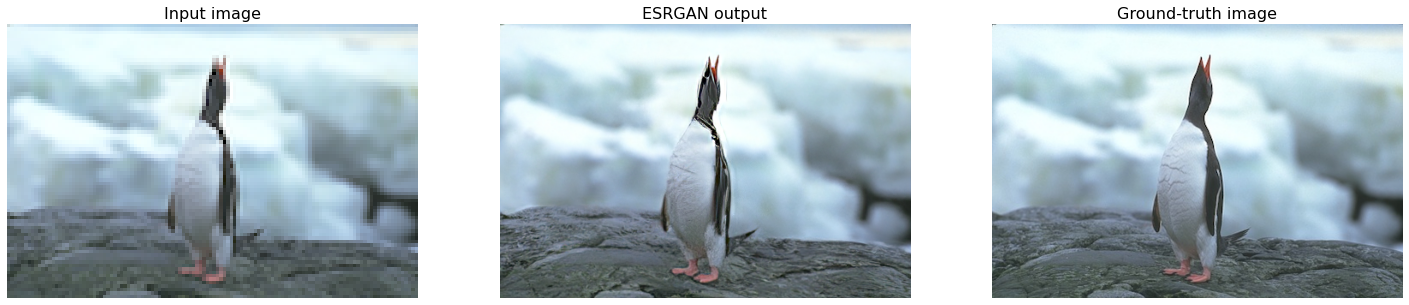

In [53]:
# read images
img_input = imread('datasets/low_res_bsd/106024.png')
img_esrgan = imread('results/ESRGAN/BSD100/106024_ESRGAN.png')
img_gt = imread('basicsr/BSDS100/106024.png')

show_results(img_input, img_esrgan,img_gt)

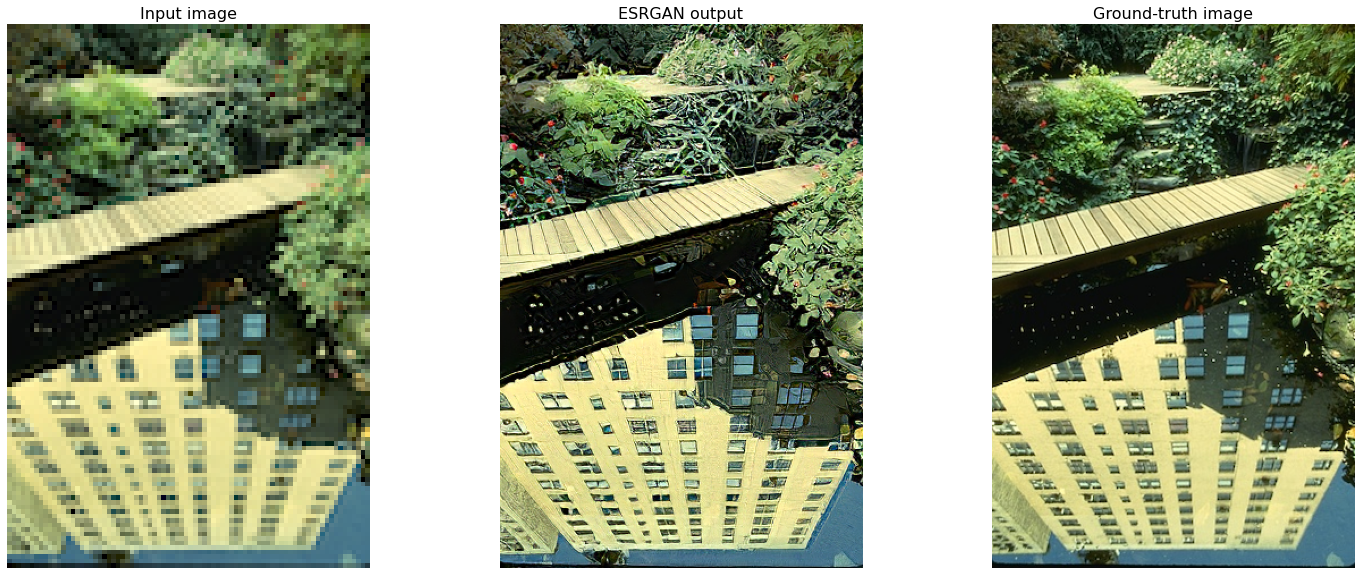

In [54]:
# read images
img_input = imread('datasets/low_res_bsd/148026.png')
img_esrgan = imread('results/ESRGAN/BSD100/148026_ESRGAN.png')
img_gt = imread('basicsr/BSDS100/148026.png')

show_results(img_input, img_esrgan,img_gt)

In [55]:
#PSNR For BSD100 images
list_hr = []
for filepath in glob.iglob('/content/BasicSR/basicsr/BSDS100/*.png'):
  list_hr.append(filepath)
list_hr.sort()

In [56]:
list_esrgan = []
for filepath in glob.iglob('/content/BasicSR/results/ESRGAN/BSD100/*.png'):
  list_esrgan.append(filepath)
list_esrgan.sort()

In [57]:
list_psnr = []
for i in range(len(list_esrgan)):
  img_hr = cv2.imread(list_hr[i])
  img_sr = cv2.imread(list_esrgan[i])
  print(list_esrgan[i],img_sr.size)
  list_psnr.append(psnr(img_hr, img_sr))

/content/BasicSR/results/ESRGAN/BSD100/101085_ESRGAN.png 460800
/content/BasicSR/results/ESRGAN/BSD100/101087_ESRGAN.png 460800
/content/BasicSR/results/ESRGAN/BSD100/102061_ESRGAN.png 460800
/content/BasicSR/results/ESRGAN/BSD100/103070_ESRGAN.png 460800
/content/BasicSR/results/ESRGAN/BSD100/105025_ESRGAN.png 460800
/content/BasicSR/results/ESRGAN/BSD100/106024_ESRGAN.png 460800
/content/BasicSR/results/ESRGAN/BSD100/108005_ESRGAN.png 460800
/content/BasicSR/results/ESRGAN/BSD100/108070_ESRGAN.png 460800
/content/BasicSR/results/ESRGAN/BSD100/108082_ESRGAN.png 460800
/content/BasicSR/results/ESRGAN/BSD100/109053_ESRGAN.png 460800
/content/BasicSR/results/ESRGAN/BSD100/119082_ESRGAN.png 460800
/content/BasicSR/results/ESRGAN/BSD100/12084_ESRGAN.png 460800
/content/BasicSR/results/ESRGAN/BSD100/123074_ESRGAN.png 460800
/content/BasicSR/results/ESRGAN/BSD100/126007_ESRGAN.png 460800
/content/BasicSR/results/ESRGAN/BSD100/130026_ESRGAN.png 460800
/content/BasicSR/results/ESRGAN/BSD100/13

In [58]:
np.mean(list_psnr)

30.35448400488626